In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

/Users/misa/ml/env/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [4]:
iris.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [5]:
iris.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [6]:
inputs = iris.iloc[:,0:4].values

In [8]:
inputs.shape

(150, 4)

In [9]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
targets = label.fit_transform(iris["class"])

In [10]:
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

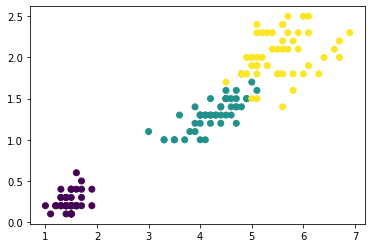

In [11]:
plt.scatter(iris["petal length"], iris["petal width"], c = targets)

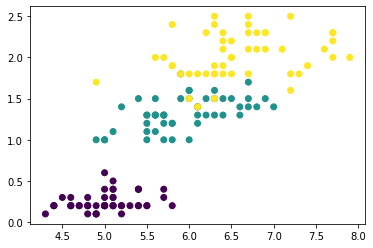

In [12]:
plt.scatter(iris["sepal length"], iris["petal width"], c = targets)

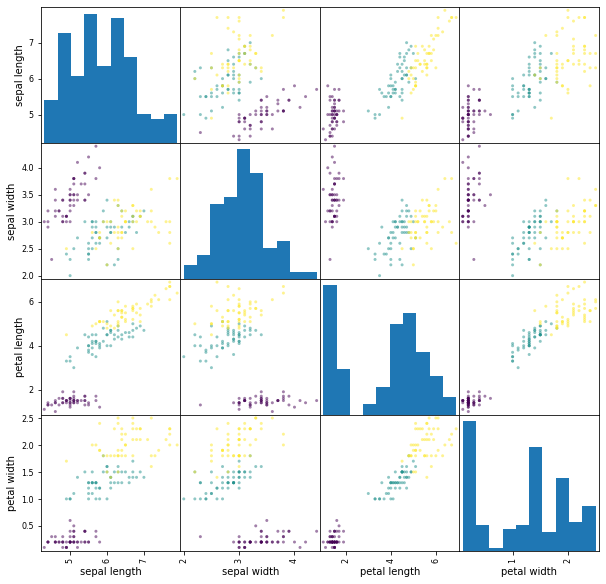

In [14]:
pd.plotting.scatter_matrix(iris.iloc[:,0:4], c = targets, figsize = (10,10));

In [15]:
def decision_tree(row):
    if row["petal length"] < 2.5:
        return 0
    elif row["petal length"] < 5.0:
        return 1
    else:
        return 2
    
num_correct = 0
for i, row in iris.iloc[:,0:4].iterrows():
    prediction = decision_tree(row)
    if prediction == targets[i]:
        num_correct +=1
        
print("accuracy =", num_correct/len(iris))

accuracy = 0.9466666666666667


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets)

In [17]:
iris_knn = knn.fit(X_train, y_train)
iris_knn.score(X_test, y_test)

0.9473684210526315

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

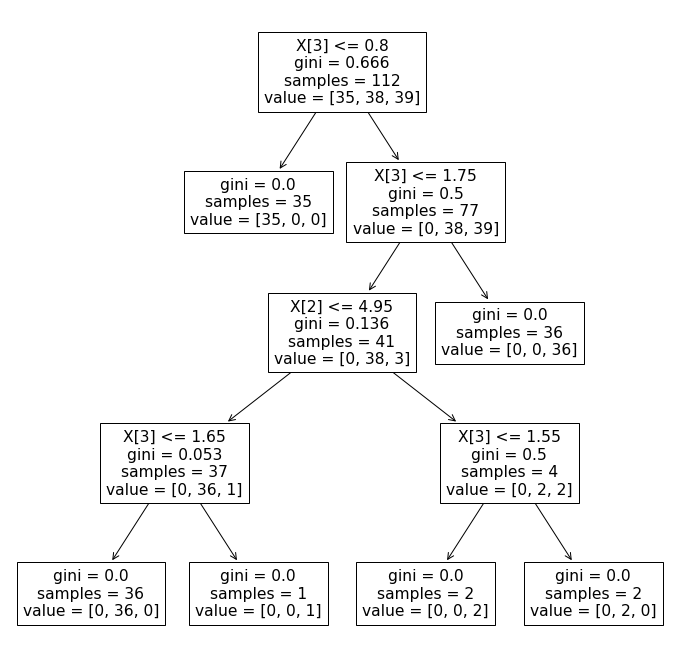

In [23]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
tree.plot_tree(clf);

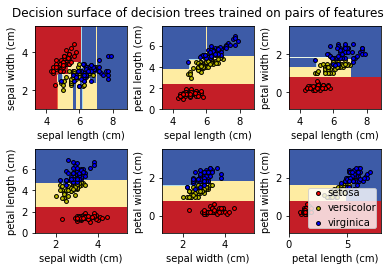

In [24]:
from sklearn.datasets import load_iris

iris_copy = load_iris()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris_copy.data[:, pair]
    y = iris_copy.target

    # Train
    clf_copy = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf_copy.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris_copy.feature_names[pair[0]])
    plt.ylabel(iris_copy.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris_copy.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
